# Naive Bayes Classification(나이브 베이즈 분류기)
+ 베이지안 정리를 적용해 모든 특성들이 독립임을 가정하는 확률적 분류 알고리즘
+ 입력데이터가 연속형일 때는 GaussianNB 사용
+ 입력데이터가 범주형일 때는 BernoulliNB 또는 MultinomialNB 사용

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.datasets import fetch_covtype, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn import metrics

In [94]:
prior = [0.45, 0.3, 0.15, 0.1]
likelihood = [[0.3, 0.3, 0.4], [0.7, 0.2, 0.1], [0.15, 0.5, 0.35], [0.6, 0.2, 0.2]]

idx = 0
for c, xs in zip(prior, likelihood):
    result = 1.
    for x in xs:
        result *= x
    result *= c
    
    idx += 1
    print(f'{idx}번째 클래스의 가능성 : {result}')

1번째 클래스의 가능성 : 0.0162
2번째 클래스의 가능성 : 0.0042
3번째 클래스의 가능성 : 0.0039375
4번째 클래스의 가능성 : 0.0024000000000000002


## 데이터가 연속형일 때

In [95]:
covtype = fetch_covtype()

df = pd.DataFrame(data=covtype.data)
df['target'] = covtype.target

df

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [96]:
df.target.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: target, dtype: int64

In [97]:
X, y = fetch_covtype(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)

print(f'전체 데이터셋 : {X.shape}')
print(f'학습 데이터셋 : {X_train.shape}')
print(f'평가 데이터셋 : {X_test.shape}')

전체 데이터셋 : (581012, 54)
학습 데이터셋 : (464809, 54)
평가 데이터셋 : (116203, 54)


## 전처리
+ 토양분류 데이터셋의 값들은 모두 숫자형으로, 정규화 필요

In [98]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 가우시안 naive bayes
+ 입력 데이터가 연속형일 때 사용
+ 입력 데이터의 분포가 가우시안 정규분포를 따른다고 가정

In [99]:
model = GaussianNB()
model.fit(X_train, y_train)

print(f'훈련데이터 점수 : {model.score(X_train, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test, y_test)}\n')

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_f1 = metrics.f1_score(y_train, y_train_pred, average=None)
test_f1 = metrics.f1_score(y_test, y_test_pred, average=None)

print(f'훈련데이터 F1 score : {train_f1}')
print(f'평가데이터 F1 score : {test_f1}')

훈련데이터 점수 : 0.088219031903427
평가데이터 점수 : 0.08805280414447131

훈련데이터 F1 score : [0.04052239 0.01793307 0.33530219 0.13813908 0.04396259 0.07533584
 0.23086249]
평가데이터 F1 score : [0.0400827  0.01802148 0.33373063 0.13918114 0.04324865 0.0726958
 0.23249189]


In [100]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

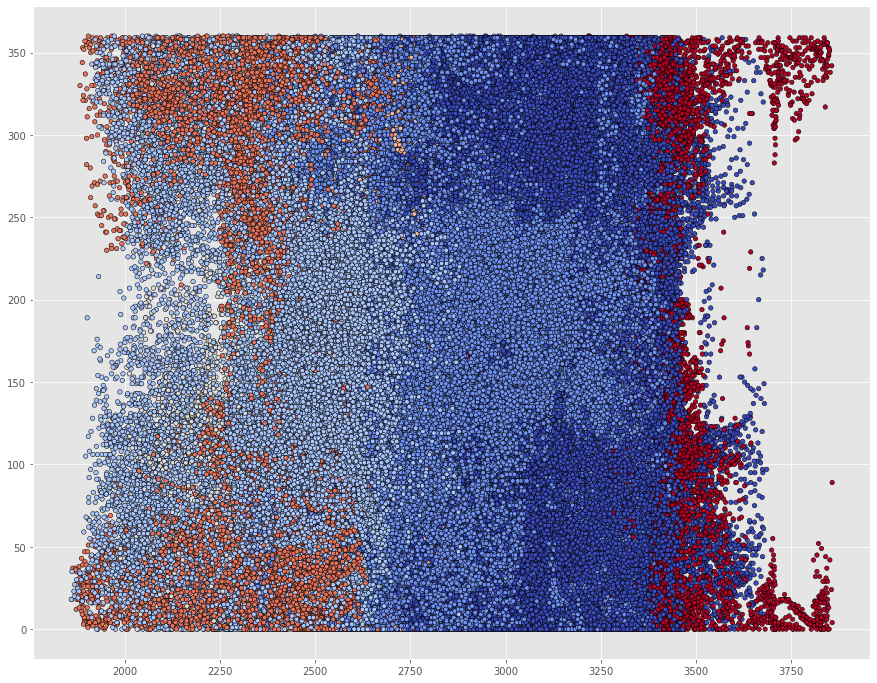

In [101]:
fig = plt.figure(figsize=(15,12))
plt.scatter(X[:,0], X[:,1],c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [102]:
#MemoryError : 13.5GiB 필요
#xx, yy = make_meshgrid(X[:, 0], X[:, 1])
#plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')

## 데이터가 범주형일 때

In [103]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')

X_train, y_train = train.data, train.target
X_test, y_test = test.data, test.target

len(X_train), len(X_test)

(11314, 7532)

## 베르누이 naive bayes
+ 입력 데이터가 범주형일 때 사용
+ 입력 데이터가 베르누이 분포에 의해 생성된 이진값을 가진다고 가정

## 전처리
+ 뉴스기사 데이터셋의 값들은 모두 텍스트로, 바로 머신러닝 모델에 입력할 수 없음  
    => 벡터화를 통해 텍스트 데이터를 float 벡터로 변환
+ scikit-learn에서는 Count, Tf-idf, Hashing 세가지 방법 지원
    + CounterVectorizer : 문서에 나온 단어의 수를 count해 벡터 생성
    + HashingVectorizer : 각 단어를 해시 값(미리 정해진 크기의 벡터)으로 표현
    + TfidfVectorizer : 문서에 나온 단어의 빈도(term freq)와 역문서빈도(inverse document freq)를 곱셈  
                        각 빈도는 일반적으로 로그 스케일링 후 사용


In [104]:
#CountVectorizer로 전처리 후 베르누이 naive bayes 모델 사용해보기
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [105]:
X_train_count
#벡터화를 거쳐 데이터를 희소행렬 형태로 표현하게 됨

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [106]:
for i in X_train_count[0]:
    print(i)
#첫번째 문서에 각 단어가 등장한 횟수 확인

  (0, 56979)	3
  (0, 75358)	2
  (0, 123162)	2
  (0, 118280)	2
  (0, 50527)	2
  (0, 124031)	2
  (0, 85354)	1
  (0, 114688)	1
  (0, 111322)	1
  (0, 123984)	1
  (0, 37780)	5
  (0, 68532)	3
  (0, 114731)	5
  (0, 87620)	1
  (0, 95162)	1
  (0, 64095)	1
  (0, 98949)	1
  (0, 90379)	1
  (0, 118983)	1
  (0, 89362)	3
  (0, 79666)	1
  (0, 40998)	1
  (0, 92081)	1
  (0, 76032)	1
  (0, 4605)	1
  :	:
  (0, 37565)	1
  (0, 113986)	1
  (0, 83256)	1
  (0, 86001)	1
  (0, 51730)	1
  (0, 109271)	1
  (0, 128026)	1
  (0, 96144)	1
  (0, 78784)	1
  (0, 63363)	1
  (0, 90252)	1
  (0, 123989)	1
  (0, 67156)	1
  (0, 128402)	2
  (0, 62221)	1
  (0, 57308)	1
  (0, 76722)	1
  (0, 94362)	1
  (0, 78955)	1
  (0, 114428)	1
  (0, 66098)	1
  (0, 35187)	1
  (0, 35983)	1
  (0, 128420)	1
  (0, 86580)	1


In [107]:
model = BernoulliNB()
model.fit(X_train_count, y_train)

print(f'훈련데이터 점수 : {model.score(X_train_count, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test_count, y_test)}\n')

y_train_pred = model.predict(X_train_count)
y_test_pred = model.predict(X_test_count)

train_f1 = metrics.f1_score(y_train, y_train_pred, average=None)
test_f1 = metrics.f1_score(y_test, y_test_pred, average=None)

print(f'훈련데이터 F1 score : {train_f1}')
print(f'평가데이터 F1 score : {test_f1}')

훈련데이터 점수 : 0.7821283365741559
평가데이터 점수 : 0.6307753584705258

훈련데이터 F1 score : [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]
평가데이터 F1 score : [0.47086247 0.60643564 0.01       0.56014047 0.6953405  0.70381232
 0.44829721 0.71878646 0.81797753 0.81893491 0.90287278 0.74794521
 0.61647059 0.64174455 0.76967096 0.63555114 0.64285714 0.77971474
 0.31382979 0.00793651]


In [108]:
#HashingVectorizer로 전처리 후 베르누이 naive bayes 모델 사용해보기
vectorizer = HashingVectorizer(n_features=1000)

X_train_hash = vectorizer.fit_transform(X_train)
X_test_hash = vectorizer.transform(X_test)

In [109]:
X_train_hash[0]

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 85 stored elements in Compressed Sparse Row format>

In [110]:
for i in X_train_hash[0]:
    print(i)
#첫번째 문서에 있는 각 단어의 해시값 확인

  (0, 80)	-0.0642824346533225
  (0, 108)	0.0642824346533225
  (0, 111)	-0.128564869306645
  (0, 145)	0.0642824346533225
  (0, 158)	0.0642824346533225
  (0, 159)	-0.0642824346533225
  (0, 161)	0.0642824346533225
  (0, 165)	-0.0642824346533225
  (0, 171)	0.0642824346533225
  (0, 182)	0.0642824346533225
  (0, 195)	-0.0642824346533225
  (0, 196)	0.19284730395996752
  (0, 205)	-0.0642824346533225
  (0, 209)	0.0642824346533225
  (0, 234)	0.0642824346533225
  (0, 237)	0.0642824346533225
  (0, 248)	0.0642824346533225
  (0, 265)	0.19284730395996752
  (0, 274)	0.0642824346533225
  (0, 277)	0.19284730395996752
  (0, 284)	-0.0642824346533225
  (0, 286)	-0.0642824346533225
  (0, 296)	0.0642824346533225
  (0, 362)	-0.0642824346533225
  (0, 364)	-0.0642824346533225
  :	:
  (0, 739)	0.0
  (0, 761)	-0.0642824346533225
  (0, 766)	0.0642824346533225
  (0, 800)	-0.0642824346533225
  (0, 812)	-0.0642824346533225
  (0, 842)	0.0642824346533225
  (0, 848)	-0.0642824346533225
  (0, 851)	0.0642824346533225
  (0

In [111]:
model = BernoulliNB()
model.fit(X_train_hash, y_train)

print(f'훈련데이터 점수 : {model.score(X_train_hash, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test_hash, y_test)}')

y_train_pred = model.predict(X_train_hash)
y_test_pred = model.predict(X_test_hash)

train_f1 = metrics.f1_score(y_train, y_train_pred, average=None)
test_f1 = metrics.f1_score(y_test, y_test_pred, average=None)

print(f'훈련데이터 F1 score : {train_f1}')
print(f'평가데이터 F1 score : {test_f1}')

훈련데이터 점수 : 0.5951917977726711
평가데이터 점수 : 0.4430430164630908
훈련데이터 F1 score : [0.74226804 0.49415205 0.45039019 0.59878155 0.57327935 0.63929619
 0.35390947 0.59851301 0.72695347 0.68123862 0.79809524 0.70532319
 0.54703833 0.66862745 0.61889927 0.74707471 0.6518668  0.60485269
 0.5324165  0.54576271]
평가데이터 F1 score : [0.46678636 0.33826638 0.29391892 0.45743329 0.41939121 0.46540881
 0.34440068 0.46464646 0.62849873 0.53038674 0.63782051 0.55251799
 0.32635983 0.34266886 0.46105919 0.61780105 0.46197991 0.54591837
 0.27513228 0.3307888 ]


In [112]:
#TfidfVectorizer로 전처리 후 베르누이 naive bayes 모델 사용해보기
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [113]:
X_train_tfidf[0]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [114]:
for i in X_train_tfidf[0]:
    print(i)
#첫번째 문서에 있는 각 단어의 tf * idf 값 확인

  (0, 86580)	0.13157118714240987
  (0, 128420)	0.04278499079283093
  (0, 35983)	0.03770448563619875
  (0, 35187)	0.09353930598317124
  (0, 66098)	0.09785515708314481
  (0, 114428)	0.05511105154696676
  (0, 78955)	0.05989856888061599
  (0, 94362)	0.055457031390147224
  (0, 76722)	0.06908779999621749
  (0, 57308)	0.1558717009157704
  (0, 62221)	0.02921527992427867
  (0, 128402)	0.05922294083277842
  (0, 67156)	0.07313443922740179
  (0, 123989)	0.08207027465330353
  (0, 90252)	0.031889368795417566
  (0, 63363)	0.08342748387969037
  (0, 78784)	0.0633940918806495
  (0, 96144)	0.10826904490745741
  (0, 128026)	0.060622095889758885
  (0, 109271)	0.10844724822064673
  (0, 51730)	0.09714744057976722
  (0, 86001)	0.07000411445838192
  (0, 83256)	0.08844382496462173
  (0, 113986)	0.17691750674853082
  (0, 37565)	0.03431760442478462
  :	:
  (0, 4605)	0.06332603952480323
  (0, 76032)	0.019219463052223086
  (0, 92081)	0.09913274493911223
  (0, 40998)	0.0780136819691811
  (0, 79666)	0.109364012524142

In [115]:
model = BernoulliNB()
model.fit(X_train_tfidf, y_train)

print(f'훈련데이터 점수 : {model.score(X_train_tfidf, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test_tfidf, y_test)}')

y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

train_f1 = metrics.f1_score(y_train, y_train_pred, average=None)
test_f1 = metrics.f1_score(y_test, y_test_pred, average=None)

print(f'훈련데이터 F1 score : {train_f1}')
print(f'평가데이터 F1 score : {test_f1}')

훈련데이터 점수 : 0.7821283365741559
평가데이터 점수 : 0.6307753584705258
훈련데이터 F1 score : [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]
평가데이터 F1 score : [0.47086247 0.60643564 0.01       0.56014047 0.6953405  0.70381232
 0.44829721 0.71878646 0.81797753 0.81893491 0.90287278 0.74794521
 0.61647059 0.64174455 0.76967096 0.63555114 0.64285714 0.77971474
 0.31382979 0.00793651]


## 다항 naive bayes
+ 입력 데이터가 범주형일 때 사용
+ 입력 데이터가 다항분포에 의해 생성된 빈도수 값을 갖는다고 가정

In [116]:
model = MultinomialNB()
model.fit(X_train_count, y_train)

print(f'훈련데이터 점수 : {model.score(X_train_count, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test_count, y_test)}\n')

y_train_pred = model.predict(X_train_count)
y_test_pred = model.predict(X_test_count)

train_f1 = metrics.f1_score(y_train, y_train_pred, average=None)
test_f1 = metrics.f1_score(y_test, y_test_pred, average=None)

print(f'훈련데이터 F1 score : {train_f1}')
print(f'평가데이터 F1 score : {test_f1}')

훈련데이터 점수 : 0.9245182959165635
평가데이터 점수 : 0.7728359001593202

훈련데이터 F1 score : [0.95228426 0.904      0.25073746 0.81402003 0.96669513 0.88350983
 0.90710383 0.97014925 0.98567818 0.99325464 0.98423237 0.95399516
 0.95703454 0.98319328 0.98584513 0.95352564 0.97307002 0.97467249
 0.95157895 0.86526946]
평가데이터 F1 score : [0.77901431 0.7008547  0.00501253 0.64516129 0.79178082 0.73370166
 0.76550681 0.88779285 0.93951094 0.91390728 0.94594595 0.78459938
 0.72299169 0.84635417 0.86029412 0.80846561 0.78665077 0.89281211
 0.60465116 0.48695652]


In [117]:
#model = MultinomialNB()
#model.fit(X_train_hash, y_train)

#print(f'훈련데이터 점수 : {model.score(X_train_hash, y_train)}')
#print(f'평가데이터 점수 : {model.score(X_test_hash, y_test)}')

#y_train_pred = model.predict(X_train_hash)
#y_test_pred = model.predict(X_test_hash)

#train_f1 = metrics.f1_score(y_train, y_train_pred, average=None)
#test_f1 = metrics.f1_score(y_test, y_test_pred, average=None)

#print(f'훈련데이터 F1 score : {train_f1}')
#print(f'평가데이터 F1 score : {test_f1}')

In [118]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

print(f'훈련데이터 점수 : {model.score(X_train_tfidf, y_train)}')
print(f'평가데이터 점수 : {model.score(X_test_tfidf, y_test)}')

y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

train_f1 = metrics.f1_score(y_train, y_train_pred, average=None)
test_f1 = metrics.f1_score(y_test, y_test_pred, average=None)

print(f'훈련데이터 F1 score : {train_f1}')
print(f'평가데이터 F1 score : {test_f1}')

훈련데이터 점수 : 0.9326498143892522
평가데이터 점수 : 0.7738980350504514
훈련데이터 F1 score : [0.87404162 0.95414462 0.95726496 0.92863002 0.97812773 0.97440273
 0.91090909 0.97261411 0.98659966 0.98575021 0.98026316 0.94033413
 0.9594478  0.98032506 0.97755611 0.77411003 0.93506494 0.97453907
 0.90163934 0.45081967]
평가데이터 F1 score : [0.63117871 0.72       0.72778561 0.72104019 0.81309686 0.81643836
 0.7958884  0.88135593 0.93450882 0.91071429 0.92917167 0.73583093
 0.69732938 0.81907433 0.86559803 0.60728118 0.76286353 0.92225201
 0.57977528 0.24390244]
